# Data  Model : Classification Model using Titanic Data  

#### Build Logistic Regression Model to Predict the Survival of a Titanic Passenger

`SKLearn API`

Knowing all attributes of a passenger, can we predict whether the passenger will survive?

---

## Overview

####  Part 1: Build Logistic Regression Classification Model

Read the cleaned Titanic dataset

Split data into train, validation, test 

Build classification model using SKLearn API and using default parameters

Model performance on validation data 

Model performance on test data

Plot performance metrics


#### Part 2: Perform Cross Validation

#### Part 3: Perform Probability Calibration 

---

## Special Note

We use scikit-learn API

The sklean algorithms use the following convention about the class labels of the data:

Negative Class : 0

Positive Class : 1

-------------------------

## Load Python Modules

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [3]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression 

In [5]:
import import_ipynb

try:
    from ipywidgets import interact, SelectMultiple
    INTERACTIVE = True
except ImportError:
    INTERACTIVE = False

In [6]:
%matplotlib inline

## Part 1 : Build Logistic Regression Model

### 1.1 : Read Data

In [7]:
"""Import Jupyter Notebook"""

# # Method  1
# import import_ipynb
# import bootcamp_data_processing

# Method  2
import ipynb
import ipynb.fs.full.example_titanicData_dataProcessing as jnds

In [8]:
train_df, test_df = jnds.train_test_ordinal
# train_df, test_df = jnds.train_test_onehot
# train_df, test_df = jnds.train_test_original

X = train_df.drop('Survived', axis=1)
y = train_df.Survived

### 1.2 : Split Data

Split training dataset in to train and validdata sets

In [9]:
"""Setting the Seed"""
theSeed = 42

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.90, random_state=theSeed)
print(f'shape of the train data: {X_train.shape}')
print(f'shape of the valid data: {X_valid.shape}')

shape of the train data: (883, 16)
shape of the valid data: (99, 16)


Format test dataset

In [11]:
X_test = test_df.drop('Survived', axis=1)
y_test = test_df.Survived
print(f'shape of the test data : {X_test.shape}')

shape of the test data : (327, 16)


### 1.3 : Scale the Data

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scalar  = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_valid = scalar.fit_transform(X_valid)
X_test  = scalar.fit_transform(X_test)

### 1.4 : Train Model

#### 1.4.1 : Setting Weight to the Data

In [13]:
# sample_weight = np.random.rand(X_train.shape[0], )

#### 1.4.2 : Logistic Regression Model 

Logistic Rergression Parameter List:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### 1.4.3 : Define model

In [14]:
# Method 1
# param_grid = {
#     'penalty' : 'l2', 
#     'dual' : False, 
#     'tol' : 0.0001, 
#     'C' : 1.0, 
#     'fit_intercept' : True, 
#     'intercept_scaling' : 1, 
#     'class_weight' : None, 
#     'random_state' : None, 
#     'solver' : 'lbfgs', 
#     'max_iter' : 100, 
#     'multi_class' : 'auto', 
#     'verbose' : 0, 
#     'warm_start' : False, 
#     'n_jobs' : None, 
#     'l1_ratio' : None
# }

# model = LogisticRegression()
# model.set_params( **param_grid )

In [15]:
# Method 2
model = LogisticRegression(
    penalty='l2', 
    dual=False, 
    tol=0.0001, 
    C=1.0, 
    fit_intercept=True, 
    intercept_scaling=1, 
    class_weight=None, 
    random_state=42, 
    solver='lbfgs', 
    max_iter=100, 
    multi_class='auto', 
    verbose=0, 
    warm_start=False, 
    n_jobs=2, 
    l1_ratio=None
)

In [16]:
# model.get_params()

#### 1.4.4 : Fit the Model

In [17]:
fit = model.fit(
    X_train, y_train,
    sample_weight=None
)

In [18]:
print("class label's order in predict_proba:", model.classes_)

class label's order in predict_proba: [0 1]


### 1.5 : Model Performance on Validation Dataset

In [19]:
y_pred  = model.predict(X_valid)

In [20]:
y_score = model.predict_proba(X_valid)

####  1.5.1 Performance Metrics

In [21]:
from sklearn import metrics

In [22]:
"""Accuracy Score"""
accuracy = metrics.accuracy_score(y_valid, y_pred, sample_weight=None, normalize=True)
print( round(accuracy, 4))

0.9293


In [23]:
"""Balanced Accuracy Score"""
balanced_accuracy = metrics.balanced_accuracy_score(y_valid, y_pred, sample_weight=None, adjusted=False)
print( round(balanced_accuracy, 4))

0.8971


In [24]:
"""ROC Curve"""
fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_score[:,1])

In [25]:
"""AUC"""
auc = metrics.auc(fpr, tpr)
print( round(auc, 4))

0.9923


In [26]:
"""Confusion Matrix"""
metrics.confusion_matrix(y_valid, y_pred)

array([[65,  0],
       [ 7, 27]])

In [27]:
tn, fp, fn, tp = metrics.confusion_matrix(y_valid, y_pred).ravel()
print(f"TN:{tn}, FP:{fp}, FN:{fn}, TP:{tp}")

TN:65, FP:0, FN:7, TP:27


In [28]:
"""F1 Score"""
f1 = metrics.f1_score(
    y_valid, y_pred, 
    labels=None, 
    pos_label=1, 
    average='binary', 
    sample_weight=None
)

print( round(f1, 4))

0.8852


In [29]:
"""Log Loss"""
metrics.log_loss(y_valid, y_score[:, 1], normalize=True, sample_weight=None, labels=[0,1])

0.1590601559827574

In [30]:
"""Precision, Recall, Fscore, Support"""
metrics.precision_recall_fscore_support(
    y_valid, y_pred, 
    labels=[0,1], 
    pos_label=1, 
    average=None, 
    sample_weight=None
)

(array([0.90277778, 1.        ]),
 array([1.        , 0.79411765]),
 array([0.94890511, 0.8852459 ]),
 array([65, 34]))

In [31]:
precision = metrics.precision_score(
    y_valid, y_pred, 
    labels=[0,1], 
    pos_label=1, 
    average='binary', 
    sample_weight=None
)

print( round(precision, 4))

1.0


In [32]:
recall = metrics.recall_score(
    y_valid, y_pred, 
    labels=[0,1], 
    pos_label=1, 
    average='binary', 
    sample_weight=None
)

print( round(recall, 4))

0.7941


### 1.6 : Model Performance on Test Dataset

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_score = model.predict_proba(X_test)

#### 1.6.1 Performance Metrics

In [35]:
from sklearn import metrics

In [36]:
"""Accuracy Score"""
accuracy = metrics.accuracy_score(y_test, y_pred, sample_weight=None, normalize=True)
print( round(accuracy, 4))

0.9297


In [37]:
"""Balanced Accuracy Score"""
balanced_accuracy = metrics.balanced_accuracy_score(
    y_test, y_pred, 
    sample_weight=None, 
    adjusted=False
)

print( round(balanced_accuracy, 4))

0.9102


In [38]:
"""ROC Curve"""
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:,1])

In [39]:
"""AUC"""
auc = metrics.auc(fpr, tpr)
print( round(auc, 4))

0.9683


In [40]:
"""Confusion Matrix"""
metrics.confusion_matrix(y_test, y_pred)

array([[200,   1],
       [ 22, 104]])

In [41]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(f"TN:{tn}, FP:{fp}, FN:{fn}, TP:{tp}")

TN:200, FP:1, FN:22, TP:104


In [42]:
"""F1 Score"""
f1 = metrics.f1_score(
    y_test, y_pred, 
    labels=None, 
    pos_label=1, 
    average='binary', 
    sample_weight=None
)

print( round(f1, 4))

0.9004


In [43]:
"""Log Loss"""
metrics.log_loss(
    y_test, y_score[:, 1], 
    normalize=True, 
    sample_weight=None, 
    labels=[0,1]
)

0.20740397339583744

In [44]:
"""Precision, Recall, Fscore, Support"""
metrics.precision_recall_fscore_support(
    y_test, y_pred, 
    labels=[0,1], 
    pos_label=1, 
    average=None, 
    sample_weight=None
)

(array([0.9009009 , 0.99047619]),
 array([0.99502488, 0.82539683]),
 array([0.94562648, 0.9004329 ]),
 array([201, 126]))

In [45]:
precision = metrics.precision_score(
    y_test, y_pred, 
    labels=[0,1], 
    pos_label=1, 
    average='binary', 
    sample_weight=None
)

print( round(precision, 4))

0.9905


In [46]:
recall = metrics.recall_score(
    y_test, y_pred, 
    labels=[0,1], 
    pos_label=1, 
    average='binary', 
    sample_weight=None
)

print( round(recall, 4))

0.8254


#### 1.6.2 : Performance Metric Plots

Confusion Matrix

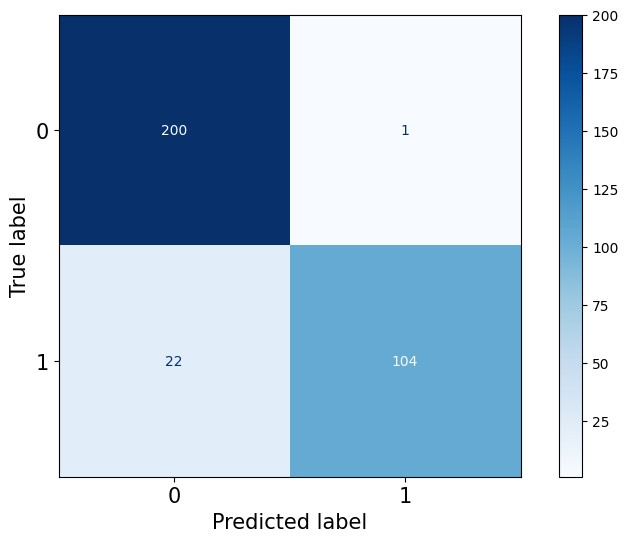

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,6))

ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['0','1'], fontdict={'size':15})
ax.set_yticklabels(['0','1'], fontdict={'size':15})

ax.set_xlabel("", fontdict={'size':15})
ax.set_ylabel("", fontdict={'size':15})


ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, 
    normalize=None, 
    sample_weight=None, 
    labels=None, 
    display_labels=[0,1], 
    cmap='Blues', #'OrRd', 
    ax=ax)

plt.show()

ROC Curve

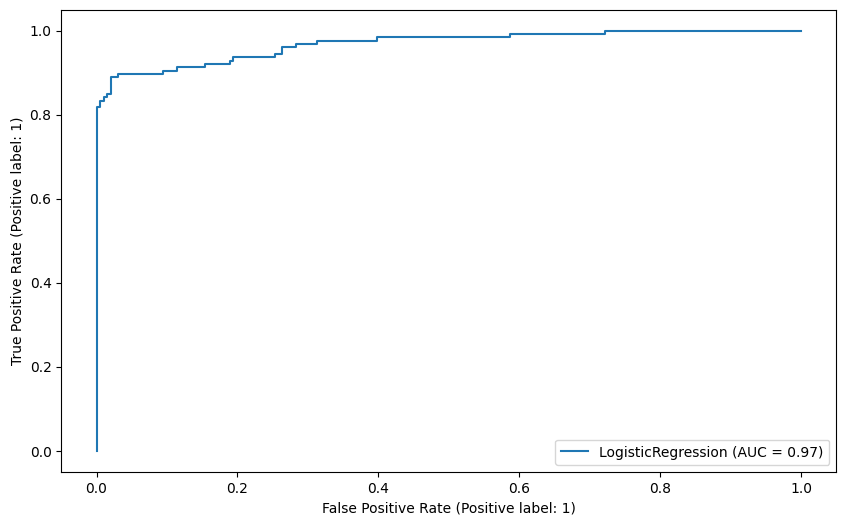

In [48]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(10,6))

RocCurveDisplay.from_estimator(model, X_test, y_test, sample_weight=None, ax=ax)

plt.show()

PR Curve

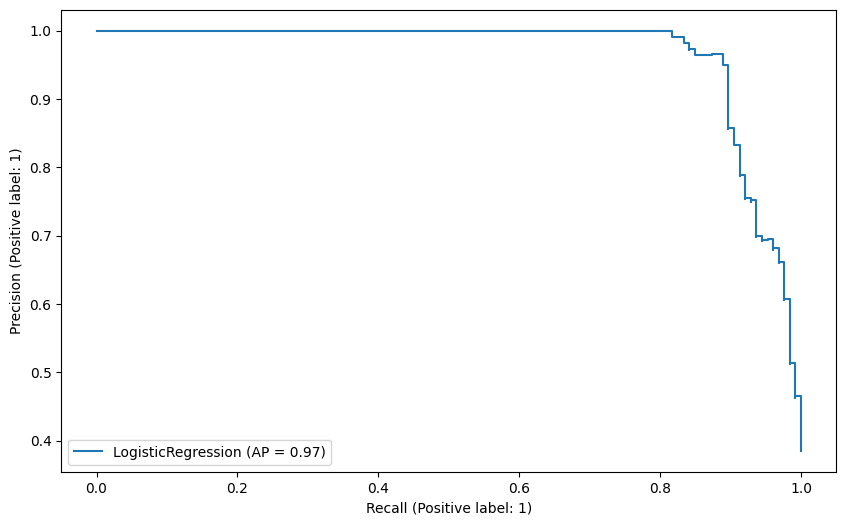

In [49]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots(figsize=(10,6))

PrecisionRecallDisplay.from_estimator(model, X_test, y_test, sample_weight=None, ax=ax)

plt.show()

#### 1.6.3 : Feature Importance

In [50]:
"""
    In Logistic Regression 
    Model coefficients are generally considered as feature importance 
"""

#  Create column name and coresponsing model coefficient dataframe 
colNames = train_df.drop(columns=['Survived']).columns.values
colCoeff = model.coef_[0]
name_coef = pd.DataFrame( np.column_stack((colNames, colCoeff)), columns=['ColName','Coeff'])
name_coef = name_coef.sort_values(by='Coeff', inplace=False)

name_coef.head(3)

,ColName,Coeff
12,Boat,-7.811304
8,Sex,-2.0012
11,Embarked,-1.158389


In [51]:
# """Plot using Pandas Plotting Routine"""
# fig, ax = plt.subplots(figsize=(12,7))

# _imp = name_coef.set_index(keys=['ColName'])
# _imp.plot(kind='barh', ax=ax, fontsize=12)

# plt.show()

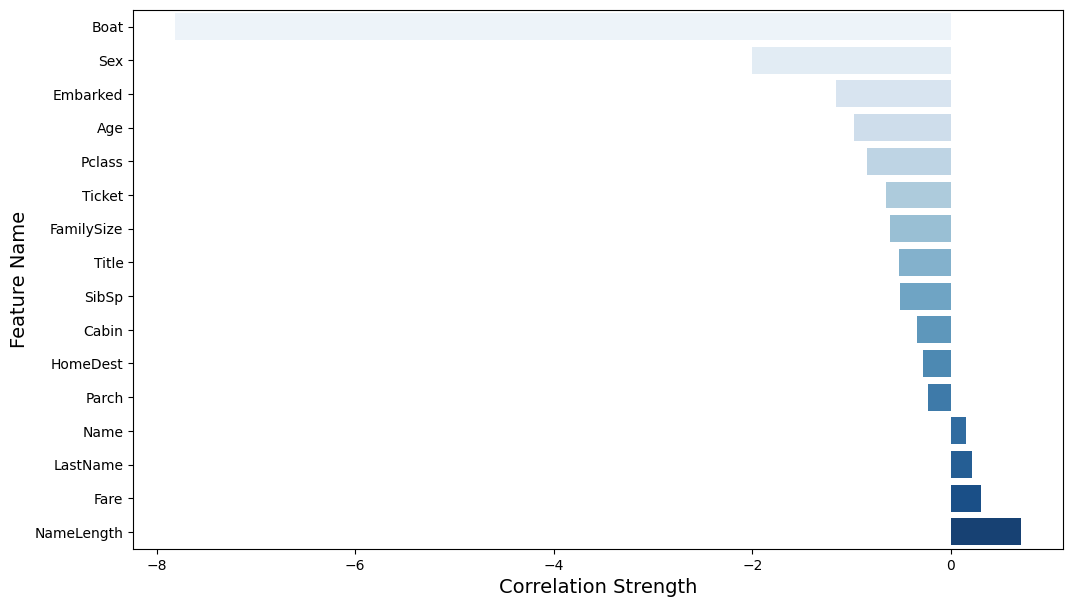

In [52]:
"""Plot using Seaborn Plotting Routine"""

import seaborn as sns

fig, ax = plt.subplots(figsize=(12,7))

sns.barplot(y='ColName', x='Coeff',  data=name_coef, orient='h', palette='Blues')
ax.set_xlabel("Correlation Strength", fontdict={'size':14})
ax.set_ylabel("Feature Name", fontdict={'size':14})

plt.show()

-----------------

## Part 2 : Perfom Cross-Validation 

Cross-Validation can be implement in two different ways. We will explore both of these methods.

To implement CV, the data is not needed to be divided manually into 'train' and 'valid'. 

### 2.1 : Normalize Datasets  

In [53]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df.Survived
X_test  = test_df.drop('Survived', axis=1)
y_test  = test_df.Survived

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

scalar = MinMaxScaler()
X_train_scale = scalar.fit_transform(X_train)
X_test_scale = scalar.fit_transform(X_test)

### 2.2 : Cross-Validation using 'cross_val_predict'

####  Warning 
Method 1 does not produce a model object. It can not be applied to  predict test data.

Despite this setback, it is still a valuable way to  explore cross validation.    

In [54]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

In [55]:
model_cv = LogisticRegression(
    penalty='l2', 
    dual=False, 
    tol=0.0001, 
    C=1.0, 
    fit_intercept=True, 
    intercept_scaling=1, 
    class_weight=None, 
    random_state=42, 
    solver='lbfgs', 
    max_iter=100, 
    multi_class='auto', 
    verbose=0, 
    warm_start=False, 
    n_jobs=2, 
    l1_ratio=None
)

#### Predict Classes

In [56]:
y_pred_cv = cross_val_predict(
    model_cv, 
    X_train_scale, y_train, 
    cv=5, 
    n_jobs=2, 
    verbose=0,
    method='predict'
)

#### Predict Probabilities

In [57]:
y_score_cv = cross_val_predict(
    model_cv, 
    X_train_scale, y_train, 
    cv=5, 
    n_jobs=2, 
    verbose=0,
    method='predict_proba'
)

Validation Scores

In [58]:
score_cv = cross_val_score(model_cv, X_train_scale, y_train, scoring='accuracy', cv=5)
score_cv

array([0.97969543, 0.92893401, 0.91326531, 0.91326531, 0.94387755])

In [59]:
score_cv = cross_validate(model_cv, X_train_scale, y_train, scoring=['accuracy','roc_auc','f1'], cv=5)
score_cv

{'fit_time': array([0.01234388, 0.01128769, 0.00980592, 0.00995684, 0.00940204]),
 'score_time': array([0.00437808, 0.00368428, 0.00339293, 0.0034349 , 0.00329995]),
 'test_accuracy': array([0.97969543, 0.92893401, 0.91326531, 0.91326531, 0.94387755]),
 'test_roc_auc': array([0.99967213, 0.97311475, 0.96034559, 0.96595041, 0.98490358]),
 'test_f1': array([0.97260274, 0.89855072, 0.87591241, 0.87943262, 0.92198582])}

#### Show the number of Miss-classifications 

[(-1, 9), (0, 919), (1, 54)]


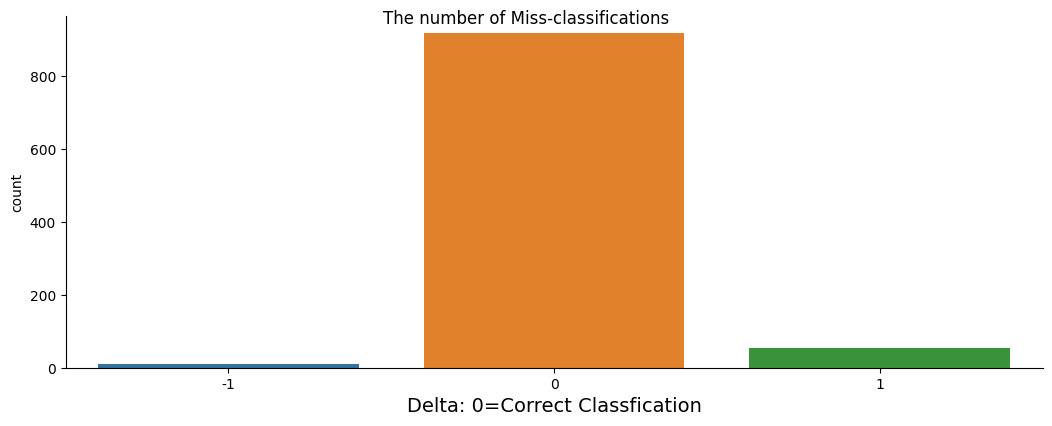

In [60]:
y_diff = y_train.to_numpy() - y_pred_cv
diff = pd.DataFrame(y_diff, columns=['Delta'], dtype=object)


b,c = np.unique(y_diff, return_counts=True)
print( list(zip(b,c)) )


# Method 1
# fig, ax = plt.subplots( figsize=(10,5) )
# tmp = diff.groupby(['Delta'], as_index=False).size()
# sns.barplot(x='Delta', y='size', hue='Delta', data=tmp, orient='v')


# Method 2
g = sns.catplot(
    x='Delta', kind='count',
    data=diff,
    height=4.25, 
    aspect=2.5,
    legend=True,
    #palette='Reds'
)

g.fig.suptitle('The number of Miss-classifications')
g.set_xlabels('Delta: 0=Correct Classfication', fontdict={'size':14}) 


plt.show()

### 2.3 : Cross-Validation using 'LogisticRegressionCV'

In [61]:
from sklearn.linear_model import LogisticRegressionCV

In [62]:
model_cv = LogisticRegressionCV(
    Cs=10, 
    fit_intercept=True, 
    cv=5, 
    dual=False, 
    penalty='l2', 
    scoring=None, 
    solver='lbfgs', #'liblinear',
    tol=0.0001, 
    max_iter=200, 
    class_weight=None, 
    n_jobs=2, 
    verbose=0, 
    refit=True, 
    intercept_scaling=1.0, 
    multi_class='auto', 
    random_state=42, 
    l1_ratios=None
)

In [63]:
fit_cv = model_cv.fit(
    X_train_scale, 
    y_train,
    sample_weight=None)

In [64]:
print("class label's order in predict_proba:", model_cv.classes_)

class label's order in predict_proba: [0 1]


#### Predict Classes

In [65]:
y_pred_cv = model_cv.predict(X_test_scale)

#### Predict Probabilities

In [66]:
y_score_cv    = model_cv.predict_proba(X_test_scale)
y_logscore_cv = model_cv.predict_log_proba(X_test_scale)

####  The Distribution of Predicted Probabilities

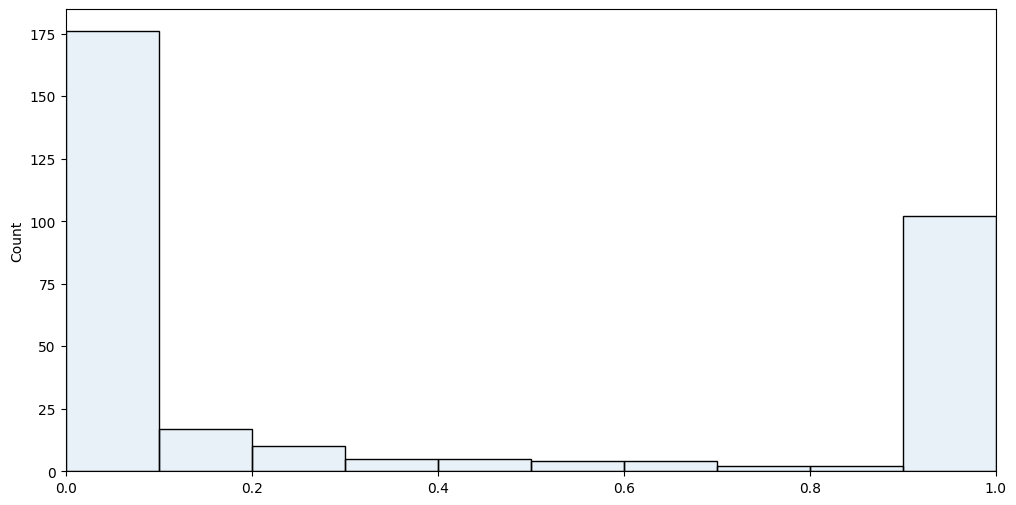

In [67]:
fig, ax = plt.subplots( figsize=(12,6) )

#sns.histplot(y_score_cv[:,0], alpha=1.0, palette='Reds', stat="count")
sns.histplot(y_score_cv[:,1], alpha=0.1, stat="count")

ax.set_xlim(0.00, 1.00)

plt.show()

----------------

## Part 3 : Perform Probability Calibration

https://scikit-learn.org/stable/modules/calibration.html#calibration

In [68]:
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

### 3.1 : Calibrate Probabilities

In [69]:
model_iso = CalibratedClassifierCV(
    estimator=model_cv, 
    method='isotonic', 
    cv='prefit'
)

fit_iso = model_iso.fit(X_test_scale, y_test)


y_pred_iso  = model_iso.predict(X_test_scale)
y_score_iso = model_iso.predict_proba(X_test_scale)

In [70]:
model_sig = CalibratedClassifierCV(
    estimator=model_cv, 
    method='sigmoid', 
    cv='prefit'
)


fit_sig = model_sig.fit(X_test_scale, y_test)

y_pred_sig  = model_sig.predict(X_test_scale)
y_score_sig = model_sig.predict_proba(X_test_scale)

### 3.2 : Display Calibrated Probabilities

Using Model Outputs (Probabilities)

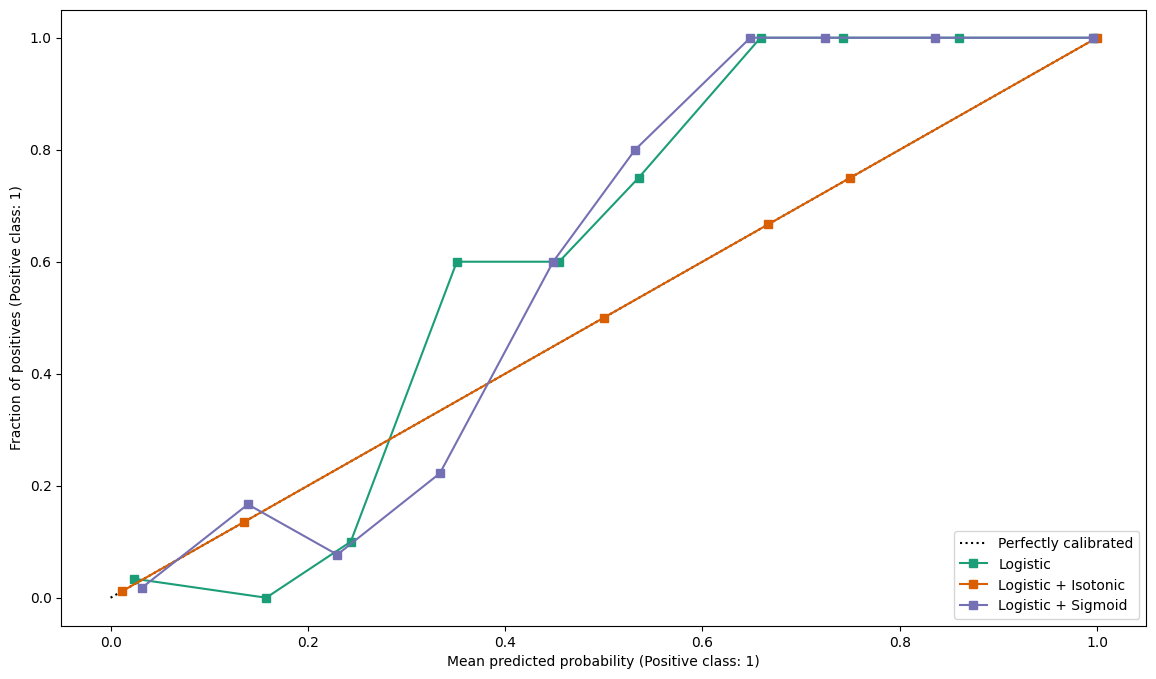

In [71]:
fig, ax = plt.subplots( figsize=(14, 8) )

model_score_list = [
    (y_score_cv[:, 1], "Logistic"),
    (y_score_iso[:,1], "Logistic + Isotonic"),
    (y_score_sig[:,1], "Logistic + Sigmoid"),
]

colors = plt.cm.get_cmap("Dark2")

for i, (y_score, name) in enumerate(model_score_list):
    display = CalibrationDisplay.from_predictions(
        y_test, y_score,
        n_bins=10, 
        name=name,
        ax=ax,
        color=colors(i)
    )

plt.show()

Using Model Estimators

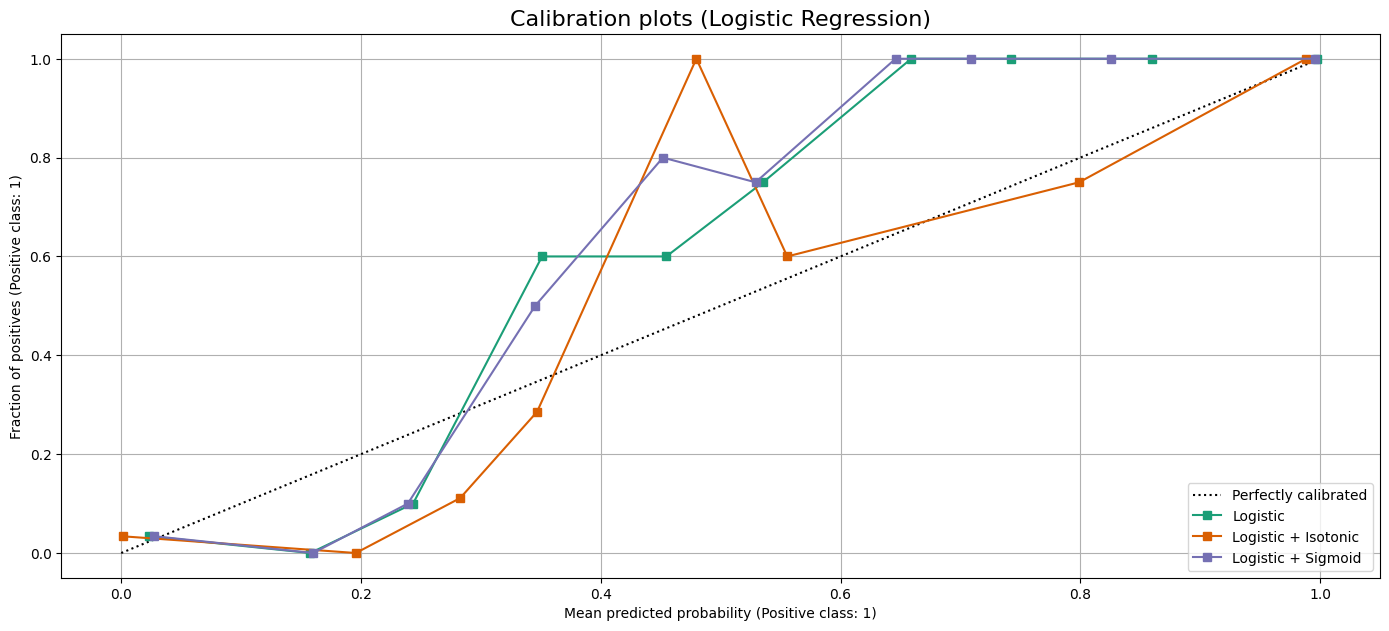

In [72]:
model_list = [
    (model_cv,  "Logistic"),
    (model_iso, "Logistic + Isotonic"),
    (model_sig, "Logistic + Sigmoid"),
]


fig = plt.figure( figsize=(14,12) )
gds = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot( gds[:2, :2] )
calibration_displays = {}

for i, (clf, name) in enumerate(model_list):
    clf.fit(X_train_scale, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test_scale,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Logistic Regression)", fontdict={'size':16})

# # Add histogram
# grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
# for i, (_, name) in enumerate(model_list):
#     row, col = grid_positions[i]
#     ax = fig.add_subplot(gs[row, col])

#     ax.hist(
#         calibration_displays[name].y_prob,
#         range=(0, 1),
#         bins=10,
#         label=name,
#         color=colors(i),
#     )
#     ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [73]:
from sklearn.metrics import brier_score_loss

print("Brier score losses: (the smaller the better)")

clf_score = brier_score_loss(y_test, y_pred, sample_weight=None)
print("No calibration: {0:0.3f}".format(clf_score))

print('')

clf_isotonic_score = brier_score_loss(y_test, y_pred_iso, sample_weight=None)
print("With isotonic calibration: {0:0.4f}".format(clf_isotonic_score))

clf_sigmoid_score = brier_score_loss(y_test, y_pred_sig, sample_weight=None)
print("With sigmoid calibration : {0:0.4f}".format(clf_sigmoid_score) )

Brier score losses: (the smaller the better)
No calibration: 0.070

With isotonic calibration: 0.0367
With sigmoid calibration : 0.0398


In [74]:
# fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (16,8))

# # Positive Class : 1
# sns.histplot(    y_score_cv[:,0], ax=ax[0,0], alpha=1.0, palette="Blues" )
# ax[0,0].set_xlim(0.20,0.80)

# sns.histplot(y_score_iso[:,0], ax=ax[0,1], alpha=1.0, palette="Reds")
# ax[0,1].set_xlim(0.0,1.00)


# # Negative Class : 0 
# sns.histplot(    y_score_cv[:,1], ax=ax[1,0], alpha=1.0, palette='Reds' )
# ax[1,0].set_xlim(0.20,0.80)

# sns.histplot(y_score_sig[:,1], ax=ax[1,1], alpha=1.0, palette='Blues')
# ax[1,1].set_xlim(0.0,1.00)


# plt.show()